 ### INTRODUCTION
Analysis of an online retail store that that ships to 38 countries. The dataset contains information on purchases for a year.                                               
Currency used for payment is in US dollars.
 
 #### Some insights this projects seeks to derive are:
 -Customers who brought in the most revenue                                                                                    
 -The most and least performing Countries                                                                           
 -Sales Trend throughout the year                                                                                               
 -Relationship between number of items purchased and revenue, with a hypothesis test to prove it's significance                 
 -Significant mean difference in sales between countries
 
 
 

In [144]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')  
import seaborn as sb
import datetime as dt

In [145]:
# read in dataset
sales_df = pd.read_excel('online_retail.xlsx')
sales_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [146]:
#check last five rows
sales_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [147]:
# random data sampling
sales_df.sample(8)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
538145,581400,22424,ENAMEL BREAD BIN CREAM,1,2011-12-08 13:36:00,12.75,14056.0,United Kingdom
8478,537136,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,3,2010-12-05 12:42:00,3.25,12748.0,United Kingdom
230070,557119,23202,JUMBO BAG VINTAGE LEAF,10,2011-06-16 17:08:00,2.08,17416.0,United Kingdom
80087,543020,22467,GUMBALL COAT RACK,3,2011-02-02 14:29:00,2.55,15005.0,United Kingdom
273885,560864,10133,COLOURING PENCILS BROWN TUBE,40,2011-07-21 13:54:00,0.42,14407.0,United Kingdom
106216,545317,20713,JUMBO BAG OWLS,2,2011-03-01 14:14:00,4.13,NaN,United Kingdom
343364,566949,22952,60 CAKE CASES VINTAGE CHRISTMAS,1,2011-09-15 16:32:00,1.25,NaN,United Kingdom
524991,580611,21833,CAMOUFLAGE LED TORCH,6,2011-12-05 11:49:00,1.69,12748.0,United Kingdom


In [148]:
# find number of columns and rows
sales_df.shape

(541909, 8)

In [149]:
#summary statistics of data
sales_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [150]:
#check for data type of each column
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [151]:
#find columns with missing values
sales_df.isna().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [152]:
#number of unique countries
sales_df['Country'].nunique()

38

In [153]:
#check for duplicate invoices
sales_df[sales_df.duplicated('InvoiceNo')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


From the above dataframe, it returned results for duplicate invoices but you could observe, customers bought multiple items at a time hence the duplication

In [154]:
#Number of unique invoice numbers
sales_df['InvoiceNo'].nunique()

25900

In [155]:
#quantity of items less than zero(0)
sales_df[sales_df['Quantity'] <= 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [156]:
#price of items <= 0 cents
sales_df[sales_df['UnitPrice'] < 1]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France
31,536370,10002,INFLATABLE POLITICAL GLOBE,48,2010-12-01 08:45:00,0.85,12583.0,France
38,536370,22661,CHARLOTTE BAG DOLLY GIRL DESIGN,20,2010-12-01 08:45:00,0.85,12583.0,France
42,536370,22540,MINI JIGSAW CIRCUS PARADE,24,2010-12-01 08:45:00,0.42,12583.0,France
...,...,...,...,...,...,...,...,...
541883,581585,84692,BOX OF 24 COCKTAIL PARASOLS,25,2011-12-09 12:31:00,0.42,15804.0,United Kingdom
541885,581585,21684,SMALL MEDINA STAMPED METAL BOWL,12,2011-12-09 12:31:00,0.85,15804.0,United Kingdom
541886,581585,22398,MAGNETS PACK OF 4 SWALLOWS,12,2011-12-09 12:31:00,0.39,15804.0,United Kingdom
541888,581585,23145,ZINC T-LIGHT HOLDER STAR LARGE,12,2011-12-09 12:31:00,0.95,15804.0,United Kingdom


In [157]:
# calculate total revenue per sale

sales_df['UnitPrice'] =sales_df['UnitPrice'].round(decimals = 1)
sales_df['AmountPaid'] = (sales_df['UnitPrice'] * sales_df['Quantity']).round(decimals = 1).astype(int)
sales_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountPaid
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.6,17850.0,United Kingdom,15
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,20
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.8,17850.0,United Kingdom,22
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,20
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,20


In [158]:
# filter out inconsistent observations:inconsistent prices

filtered_df = sales_df.loc[(sales_df['Quantity'] >=  1) & (sales_df['UnitPrice'] >= 1)].reset_index(drop = True).copy()
filtered_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountPaid
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.6,17850.0,United Kingdom,15
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,20
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.8,17850.0,United Kingdom,22
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,20
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,20


In [159]:
#check that inconsistent observations are filtered out 
print(filtered_df[filtered_df['UnitPrice'] < 1])
filtered_df[filtered_df['Quantity'] < 1]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, AmountPaid]
Index: []


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountPaid


In [160]:
#convert customer id data type to string
#first remove the decimal points
filtered_df['CustomerID'] = filtered_df['CustomerID'].apply(lambda x: f'{x:.0f}')
filtered_df['CustomerID'] = filtered_df['CustomerID'].astype('str')
print(filtered_df.info())
filtered_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420738 entries, 0 to 420737
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    420738 non-null  object        
 1   StockCode    420738 non-null  object        
 2   Description  420738 non-null  object        
 3   Quantity     420738 non-null  int64         
 4   InvoiceDate  420738 non-null  datetime64[ns]
 5   UnitPrice    420738 non-null  float64       
 6   CustomerID   420738 non-null  object        
 7   Country      420738 non-null  object        
 8   AmountPaid   420738 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(5)
memory usage: 27.3+ MB
None


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountPaid
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.6,17850,United Kingdom,15
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.4,17850,United Kingdom,20
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.8,17850,United Kingdom,22
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.4,17850,United Kingdom,20
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.4,17850,United Kingdom,20


In [161]:
#fill in missing customer id columns
filtered_df['CustomerID'].fillna('Not provided',inplace = True)

filtered_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420738 entries, 0 to 420737
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    420738 non-null  object        
 1   StockCode    420738 non-null  object        
 2   Description  420738 non-null  object        
 3   Quantity     420738 non-null  int64         
 4   InvoiceDate  420738 non-null  datetime64[ns]
 5   UnitPrice    420738 non-null  float64       
 6   CustomerID   420738 non-null  object        
 7   Country      420738 non-null  object        
 8   AmountPaid   420738 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(5)
memory usage: 27.3+ MB


In [162]:
#extract date, month,day and quarter of the year from datetime variable

filtered_df['InvoiceDate1'] = filtered_df['InvoiceDate'].dt.strftime('%Y-%m-%d')
filtered_df['Month'] = filtered_df['InvoiceDate'].dt.month_name()
filtered_df['Day'] = filtered_df['InvoiceDate'].dt.day_name()
filtered_df['Quarter'] = filtered_df['InvoiceDate'].dt.quarter
filtered_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountPaid,InvoiceDate1,Month,Day,Quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.6,17850,United Kingdom,15,2010-12-01,December,Wednesday,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.4,17850,United Kingdom,20,2010-12-01,December,Wednesday,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.8,17850,United Kingdom,22,2010-12-01,December,Wednesday,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.4,17850,United Kingdom,20,2010-12-01,December,Wednesday,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.4,17850,United Kingdom,20,2010-12-01,December,Wednesday,4


In [163]:
#Check for start and end dates 
print(filtered_df['InvoiceDate'].max())

filtered_df['InvoiceDate'].min()

2011-12-09 12:50:00


Timestamp('2010-12-01 08:26:00')

In [164]:
#Check for days in the dataset
filtered_df['Day'].unique()       #it seems this online store do not process orders on saturdays

array(['Wednesday', 'Thursday', 'Friday', 'Sunday', 'Monday', 'Tuesday'],
      dtype=object)

In [165]:
#months included in the dataset
filtered_df['Month'].unique()

array(['December', 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November'], dtype=object)

In [166]:
#Number of unique customers
filtered_df['CustomerID'].nunique()

4305

In [167]:
# Unique customer Id
filtered_df['CustomerID'].value_counts(normalize = True)   #Customers with no identification make up 27% of customers

nan      0.271941
17841    0.014004
14096    0.010793
14911    0.010384
12748    0.007725
           ...   
17956    0.000002
13270    0.000002
16144    0.000002
17940    0.000002
13120    0.000002
Name: CustomerID, Length: 4305, dtype: float64

In [168]:
# drop the original Invoice date
filtered_df.drop('InvoiceDate', axis = 1, inplace = True)

In [169]:
#rename InvoiceDate1 to InvoiceDate
filtered_df.rename(columns = {'InvoiceDate1':'InvoiceDate'}, inplace = True)
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420738 entries, 0 to 420737
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    420738 non-null  object 
 1   StockCode    420738 non-null  object 
 2   Description  420738 non-null  object 
 3   Quantity     420738 non-null  int64  
 4   UnitPrice    420738 non-null  float64
 5   CustomerID   420738 non-null  object 
 6   Country      420738 non-null  object 
 7   AmountPaid   420738 non-null  int32  
 8   InvoiceDate  420738 non-null  object 
 9   Month        420738 non-null  object 
 10  Day          420738 non-null  object 
 11  Quarter      420738 non-null  int64  
dtypes: float64(1), int32(1), int64(2), object(8)
memory usage: 36.9+ MB


In [170]:
#rename countries-'Eire' and 'RSA'
filtered_df['Country'] = filtered_df['Country'].replace(['EIRE','RSA'],['Ireland','South Africa'])

In [171]:
#summary statistics of our final dataframe
filtered_df.describe()

,Quantity,UnitPrice,AmountPaid,Quarter
count,420738.000000,420738.000000,420738.000000,420738.000000
mean,8.274045,4.766621,22.434755,2.830457
std,171.630310,40.271303,303.455433,1.143278
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.600000,4.000000,2.000000
50%,3.000000,2.900000,12.000000,3.000000
75%,8.000000,5.000000,19.000000,4.000000
max,80995.000000,13541.300000,170089.000000,4.000000


In [172]:
#check final dataframe

filtered_df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,AmountPaid,InvoiceDate,Month,Day,Quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.6,17850,United Kingdom,15,2010-12-01,December,Wednesday,4
1,536365,71053,WHITE METAL LANTERN,6,3.4,17850,United Kingdom,20,2010-12-01,December,Wednesday,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.8,17850,United Kingdom,22,2010-12-01,December,Wednesday,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.4,17850,United Kingdom,20,2010-12-01,December,Wednesday,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.4,17850,United Kingdom,20,2010-12-01,December,Wednesday,4



### EXPLORATORY ANALYSIS

##### Sales Trend for the entire 12 months

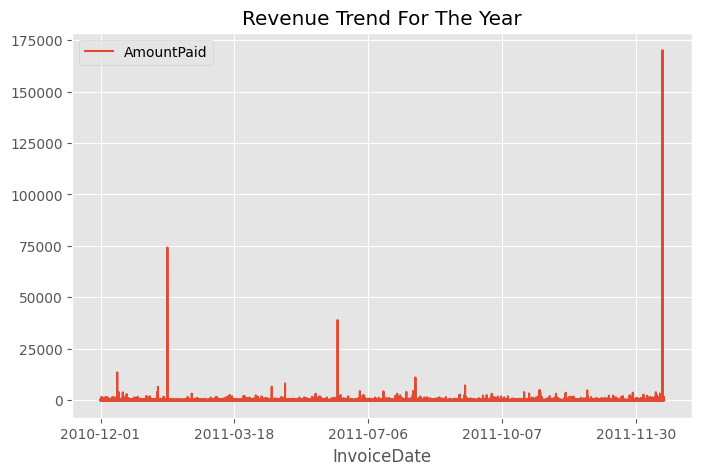

In [173]:
sales_trend = filtered_df[['InvoiceDate', 'AmountPaid']]
sales_trend.set_index('InvoiceDate').plot.line(figsize = (8,5)).set_title('Revenue Trend For The Year');



Revenue for this store has been steadily low for most part of the year except for February,June and December(which is giving us very high revenue, probably because it's december and people tend to buy a lot).                                              
This plot is not giving us a clear revenue trend so let's drill down some more.

##### Revenue Distribution

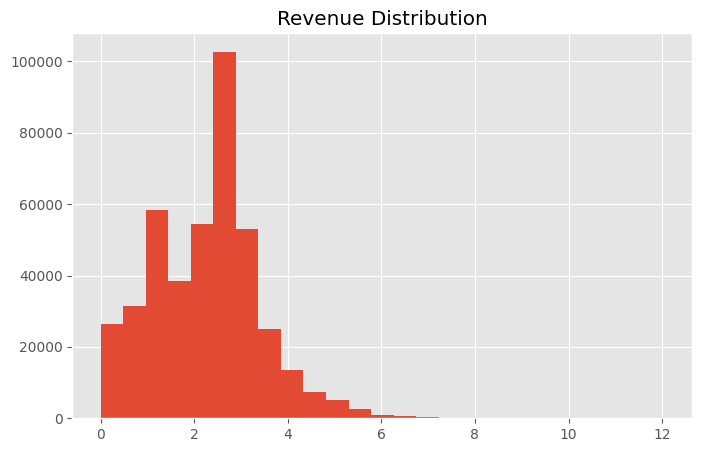

In [174]:
#revenue distribution
plt.figure(figsize = (8,5))
plt.hist( np.log(filtered_df['AmountPaid']), bins = 25)
plt.title('Revenue Distribution');


The histogram above is right skewed;the peak of the graph lies to the left side of the centre and most of the revenue is concentrated in the lower range.                                                                                               
Roughly revenue is generated from within the range of 3 dollars.That is,items purchased from this store was usually about 3 dollars

##### Average Sales Trend for each day of the week

In [175]:
#average sales per day
avg_day= filtered_df.groupby('Day')['AmountPaid'].mean()
avg_day

Day
Friday       25.704997
Monday       21.275279
Sunday       14.224356
Thursday     24.220793
Tuesday      24.376418
Wednesday    22.174701
Name: AmountPaid, dtype: float64

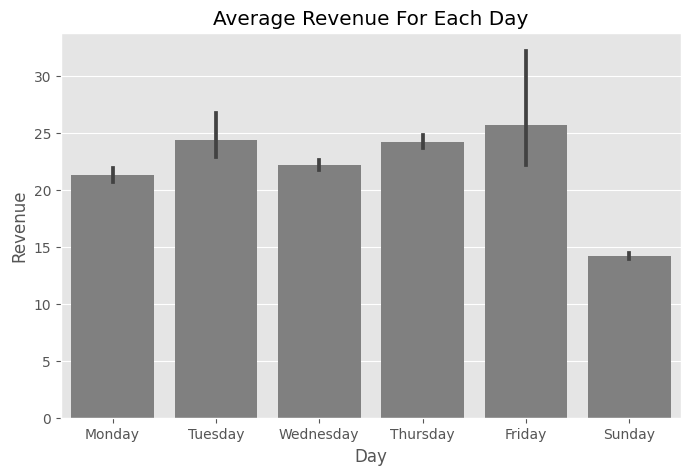

In [176]:
#revenue trend for days of the week
plt.figure(figsize = (8,5))
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Sunday']
sb.barplot(data = filtered_df, x = 'Day', y ='AmountPaid', order = order,color = 'grey')
plt.title('Average Revenue For Each Day')
plt.ylabel('Revenue');

On average, sales generated each day did not go above 30 dollars.                                                         
Averages sales on Fridays is about 26 dollars which is the highest while Sundays' average sales is about 14 dollars which is the lowest.
The error bars shows the variability of sales and how reliable the mean value is as an estimate of the true population.         
The longer the error bar, the more inconsistent and unreliable the mean value is.

##### Top five customers with high revenue

CustomerID
nan      1662045
18102     258518
14646     239034
17450     192231
16446     170091
Name: AmountPaid, dtype: int32


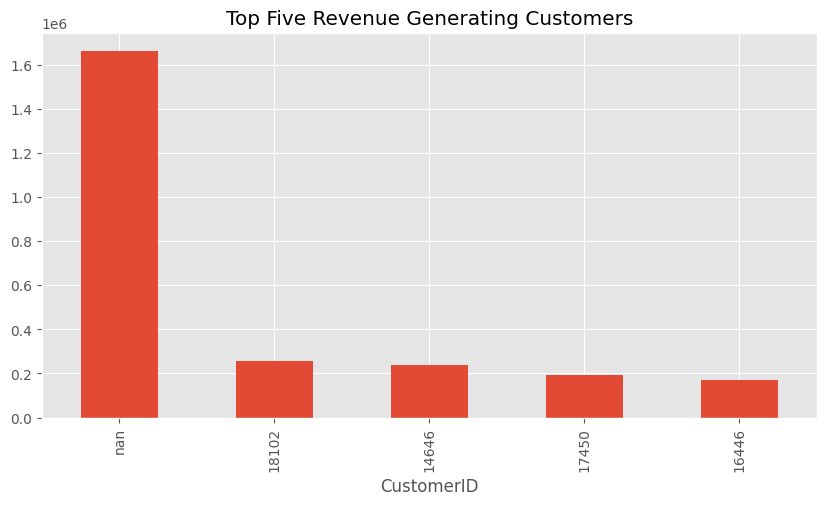

In [177]:
# Top five customers
top_customers = filtered_df.groupby('CustomerID')['AmountPaid'].sum().sort_values(ascending = False).head()
print(top_customers)
top_customers.plot(kind = 'bar' ,figsize =(10,5))
plt.title('Top Five Revenue Generating Customers');

From the bar graph above, Customers with no identification generated the most revenue, about 1,662,045 dollars.                     
Among the identified customers, customers with ID '18102' generated the most revenue of about  258,518 dollars.   
Customer ID '17450' and '16446' followed with about 192,231 and 170,091 dollars respectively


#### Monthly and Quarterly sales trends

In [178]:
#monthly and quarterly sales
month_sales = filtered_df.groupby('Month')['AmountPaid'].sum().sort_values(ascending = False)
print(month_sales)

quarter_sales = filtered_df.groupby('Quarter')['AmountPaid'].sum().sort_values(ascending = False)
quarter_sales

Month
November     1349975
December     1332949
October      1014931
September     929897
May           678791
June          672792
August        667460
March         632675
July          620980
January       618239
April         464301
February      456164
Name: AmountPaid, dtype: int32


Quarter
4    3697855
3    2218337
2    1815884
1    1707078
Name: AmountPaid, dtype: int32

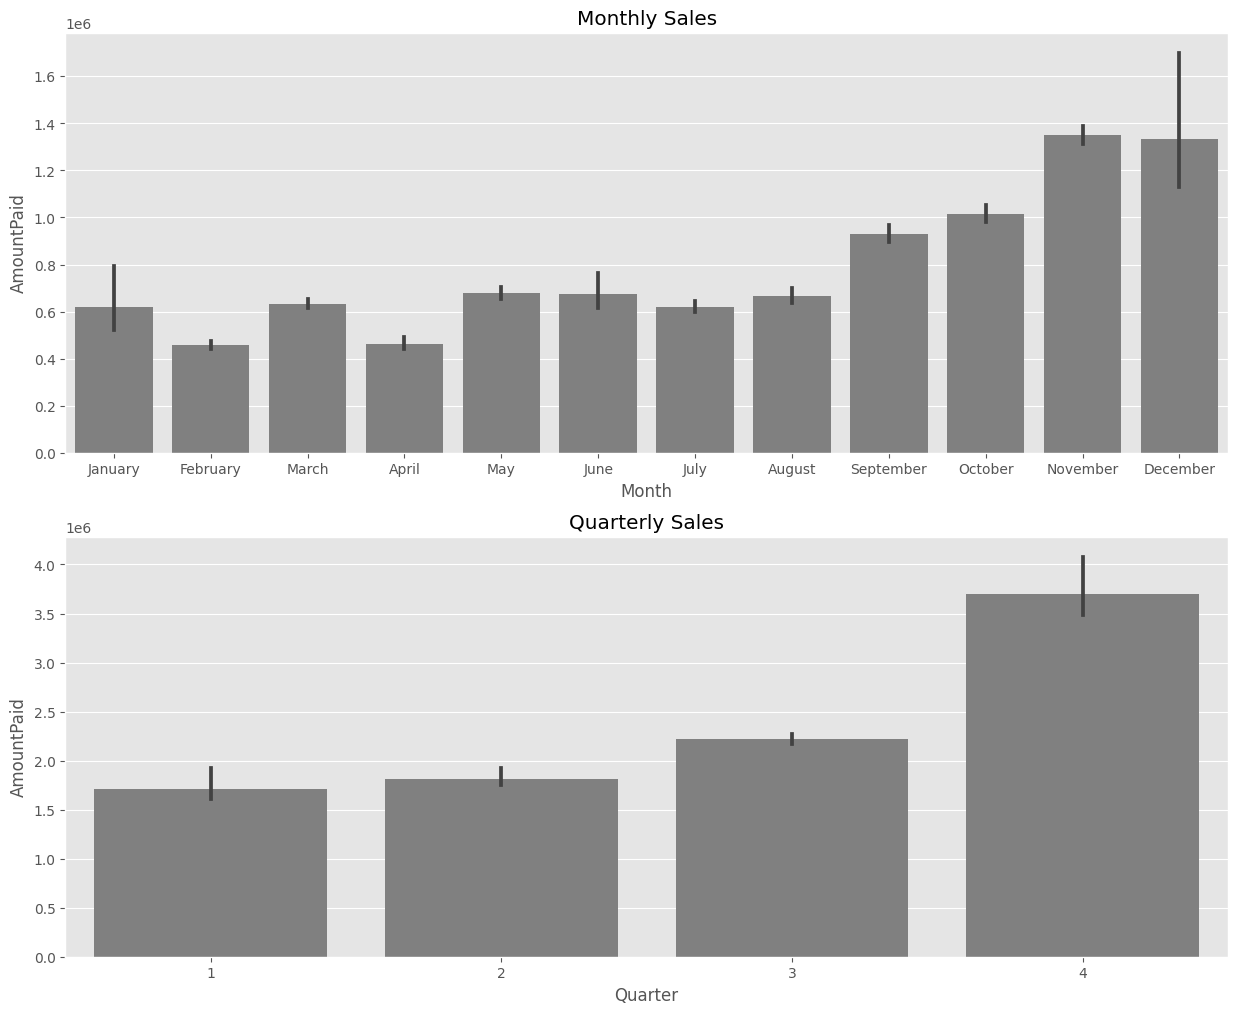

In [179]:
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

order = ['January','February','March','April','May','June','July','August','September',
         'October','November','December']
sb.barplot(ax = axes[0],data = filtered_df, x = 'Month', y = 'AmountPaid', estimator = 'sum', color = 'grey',order = order)
axes[0].set_title('Monthly Sales')

sb.barplot(ax = axes[1],data = filtered_df, x = 'Quarter', y = 'AmountPaid', estimator = 'sum', color = 'grey')
axes[1].set_title('Quarterly Sales');

From the bar graphs above,                                                                                                    
Sales in January was 618,239 dollars then it begun to fluctuate till July and right after, there is a steady rise till November which made 1,349,975 dollars and then it falls in December by 17,000 dollars. The actual sales in December was 1,332,949 dollars.                                                                                                                       


From the Quartely graph,there is steady rise in revenue from the 1st to the 4th quarter.                                       
The first quarter recorded 1,707,078 dollars while the 4th Quarter which is the highest,made about 3,697,855 dollars.                                                                                        
I would want to believe this is so because of the usual annual discount sales towards the end of the year


#### Relationship between Quantity of items sold and Revenue

Note:
The two variables 'Quantity' and 'AmountPaid' used in this plot vary in range so I will scale both variables using the np.log() method

Correlation coefficient:  0.9113776879541915


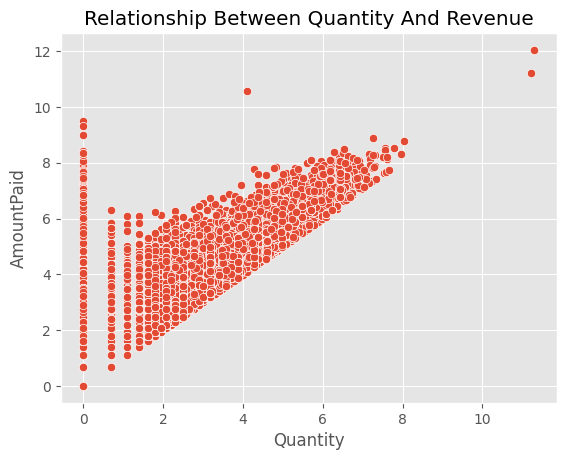

In [180]:
print('Correlation coefficient: ',np.corrcoef(filtered_df['Quantity'],filtered_df['AmountPaid'])[0,1])
sb.scatterplot(data = filtered_df, x = np.log(filtered_df['Quantity']), y =np.log(filtered_df['AmountPaid']))
plt.title('Relationship Between Quantity And Revenue');

There is a positive linear relationship between these variables.That is, the more items bought,the more revenue is generated.        
This does not assume causation

#### Hypothesis test for relationship between 'Quantity' and 'AmountPaid' variables

                                                                                            
Null hypothesis $H_{o}$ :There's no correlation between Quantity of items sold and Revenue generated('AmountPaid)                       
Alternate hypothesis $H_{1}$ :There's a correlation between Quantity of items sold and Revenue generated('AmountPaid)                          
Significance level = 0.05

In [181]:
#test for significance
from scipy.stats import pearsonr

pearsonr(filtered_df['Quantity'], filtered_df['AmountPaid'])

PearsonRResult(statistic=0.9113776879541342, pvalue=0.0)

The correlation coefficient = 0.9, which is a positive correlation. The p-value = 0.0 which is less than 0.05.We reject the null hypothesis. There exist a statistically significant relationship between these two variables

#### Top five countries that generated high revenue

In [182]:
#top five countries

top_country = filtered_df.groupby('Country')['AmountPaid'].sum().sort_values(ascending = False)
top_country.head()

Country
United Kingdom    8012072
Ireland            251272
Netherlands        243137
Germany            199828
France             181919
Name: AmountPaid, dtype: int32

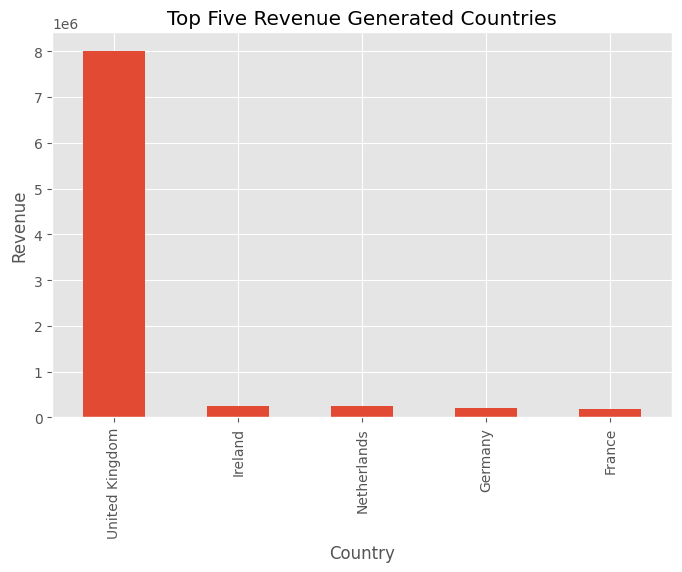

In [183]:
#top five countries with high revenue
top_five = filtered_df.groupby('Country')['AmountPaid'].sum().sort_values(ascending = False).head()
top_five.plot(kind = 'bar',figsize = (8,5))
plt.ylabel('Revenue')
plt.title('Top Five Revenue Generated Countries');



United Kingdom generated the largest chunk of revenue with sum of 8,012,072 dollars.                                                     
The second country,Ireland, follows with about 251,272 dollars.                                                                 
The least among the top five countries is France with  181,919 dollars                                                        



#### Hypothesis test  for difference in mean sales
 
 Since there is a significant difference in revenue between United Kingdom and the other countries, I may need to run a two-sample t-test to determine if the difference in mean sales between the UK and  and second most contributing country,Ireland is statistically significant.              
But this test must satisfy certain assumptions for the result to be significant.





Let's continue to check for these assumptions first!
 


#### For a ttest between these two countries, these Assumptions must be checked:                                                                                       

The samples are independent: The sales for one country should not affect the sales for the other country.                        
The samples are normally distributed: You can check this by visualizing the distribution of the sales data for each country using a histogram or a Q-Q plot.                                                                                                
Homogeneity of variance (The variances of the samples are equal): You can check this using a test for equal variances such as Levene's test.



If these assumptions are not met, then there would be a need to use a different statistical test such as a non-parametric test like the Mann-Whitney U test.








### Assumptions Check

#### Check for independent samples

We will assume that each customer made purchases while being in the same country throughout the time this data was collected

#### Check for Normality
We check for the distribution of the continuous  variable for our two categorical variables -'United Kingdom' and 'Ireland'

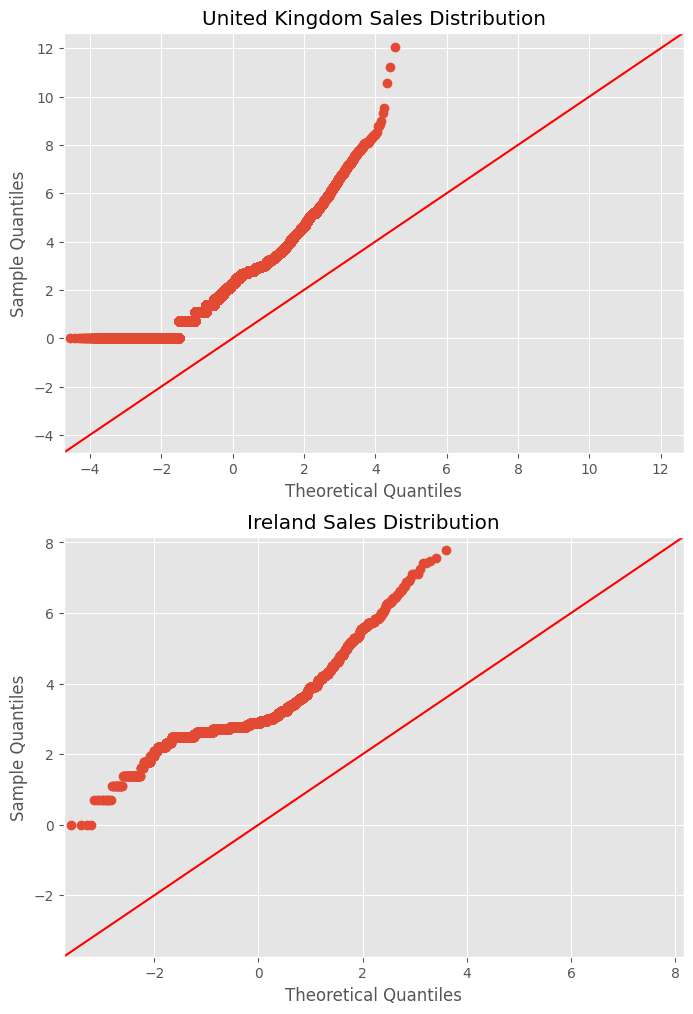

In [184]:
import statsmodels.api as sm

fig, axes = plt.subplots(2, 1, figsize=(8, 12))
df =np.log(filtered_df[filtered_df['Country'] == 'United Kingdom']['AmountPaid'])
           
df1=np.log(filtered_df[filtered_df['Country'] == 'Ireland']['AmountPaid'])

sm.qqplot(ax = axes[0], data = df, line ='45')
axes[0].set_title('United Kingdom Sales Distribution') 

sm.qqplot(ax = axes[1], data = df1, line ='45')
axes[1].set_title('Ireland Sales Distribution');
           


This distribution is highly skewed so it does not meet the Normality assumption

#### Check for homogeneity of variance (equal variance)

Null hypothesis:There is no difference in variance                                                                             
Alternate hypothesis : There is difference in variance

In [185]:
from scipy.stats import levene

#choose alpha
significance_level = 0.05

# Extract the sales data for each country
sales_by_country = filtered_df.groupby('Country')['AmountPaid']

# Perform Levene's test
statistic, p_value = levene(sales_by_country.get_group('United Kingdom'), sales_by_country.get_group('Ireland'), 
                            center = 'mean')
print(statistic, p_value)

# If the p-value is less than 0.05, the variances are not equal
if p_value < significance_level:
    print("The variances are not equal.")
else:
    print("The variances are equal.")

15.933001434235685 6.563639202912271e-05
The variances are not equal.


It also didn't meet the equal variance assumption since the pvalue is less than 0.05

There is the need to look at a non-parametric test like the Mann-Whitney U test which does not require the assumption of normality.

#### Mann-Whitney U Test (Significance Test)

Null hypothesis $H_{o}$ : There is no difference in mean sales between between UK and Ireland           
Alternate hypothesis $H_{1}$ : There is a  difference in mean sales between between UK and Ireland                             
Significance level = 0.05   

In [186]:
from scipy.stats import mannwhitneyu

#Extract revenue data for each country
sales_by_country = filtered_df.groupby('Country')['AmountPaid']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(sales_by_country.get_group('United Kingdom'), sales_by_country.get_group('Ireland'))

print(statistic,p_value)

# If the p-value is less than 0.05, the difference in mean sales is statistically significant
if p_value < 0.05:
    print("The difference in mean sales is statistically significant.")
else:
    print("The difference in mean sales is not statistically significant.")

577523684.0 0.0
The difference in mean sales is statistically significant.


We reject the null hypothesis since the pvalue is less than the significance level.                                            
Therefore, we accept the alternate hypothesis that there is a difference in mean sales betwee these two countries

#### Top five countries that bought the most items

In [187]:
#countries with most items purchased

top_five= filtered_df.groupby('Country')['Quantity'].sum().sort_values(ascending = False).head()
top_five

Country
United Kingdom    2925701
Netherlands        127131
Ireland             87498
Germany             72129
France              68468
Name: Quantity, dtype: int64

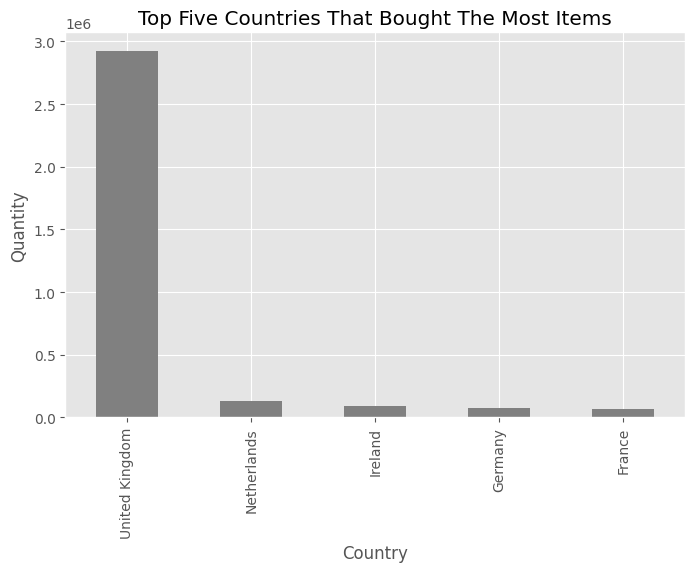

In [188]:
top_five_C = filtered_df.groupby('Country')['Quantity'].sum().sort_values(ascending = False).head()
top_five_C.plot(kind = 'bar',figsize = (8,5),color = 'grey')
plt.ylabel('Quantity')
plt.title('Top Five Countries That Bought The Most Items');

The top five Countries that generated the most revenue also bought the most items.                                             
Ireland brought in more money than the Netherlands but the Netherlands purchased more items.

#### Bottom five countries with the least Generated revenue

In [189]:
#countries with the least sales
least_rev= filtered_df.groupby('Country')['AmountPaid'].sum().sort_values(ascending = False).tail() 
least_rev

Country
Brazil            1118
South Africa       969
Bahrain            742
Czech Republic     584
Saudi Arabia       138
Name: AmountPaid, dtype: int32

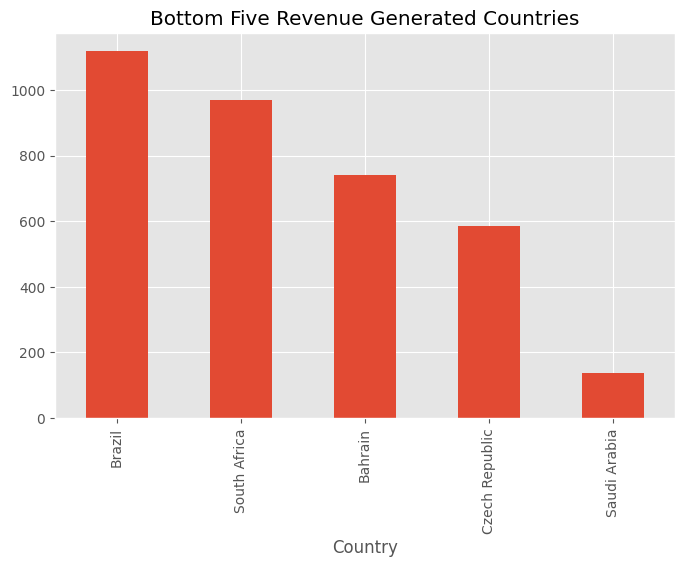

In [190]:
bottom_five = filtered_df.groupby('Country')['AmountPaid'].sum().sort_values(ascending = False).tail()
bottom_five.plot(kind = 'bar',figsize = (8,5))
plt.title('Revenue')
plt.title('Bottom Five Revenue Generated Countries');



From the bottom five countries, Saudi Arabia generated the least which is about 138 dollars.                                   
The highest among these countries is Brazil with about 1,118 dollars

#### SUMMARY

-Most purchases made falls around 3 dollars.  

-In January,sales was 618,239 which took a dip and fluctuated till July and then steadily rose from August to November where it peaked at 1,349,975 dollars and it reduced in December by a margin of 17,000 dollar.The actual sales in December was 1,332,949 dollars.
The least revenue were recorded in February and April with 456,164 and 464,301 dollars respectively


-Revenue recorded for the first quarter was 1,707,078 dollars and it had a steady rise till the 4th quarter where it peaked at  3,697,855 dollars.           

-Customers without ID brought the largest revenue of 1,662,045 dollars. The customer that brought in the highest revenue is  customer ID '18102' with 258,518 dollars  


-There is a positive relationship between quantity of items purchased and revenue and has a statistical significance to it,proven by the hypothesis test. Revenue increases as more items are purchased.This does not mean a causal effect.                                                                                                                                             

-Customers from the United Kingdom brought in the most revenue at about 8,012,072 dollars.The second country is Ireland with 251,272 dollars.                                                                                                                  

-Countries that generated the most revenue also bought the most items this goes to prove our hypothesis of positive relation between quantity of items purchased and revenue.                 

-Saudi Arabia generated the least revenue among all the countries.This store made only 138 dollars from Saudi Arabia.


#### RECOMMENDATIONS

-Launch a global campaign to appeal to customers in countries across the world.                                               

-For an unbiased analysis on customers,the store's database should be optimised to capture the identity of all customers so we can further get insights into the customers who truly bring in more revenue. This way,they would not be left out of target discounts and loyalty programs.This could help prevent customer churn.                                                         

-This store could target their advertisements towards customers from the least performing countries to attract them to purchase more. There could be other strategies like subsidising shipping fees for these customers.                                       

-If feasible, the store could run periodic discount sales across the year to attract new customers and retain old customers.   


-To curb the issue of customers largely purchasing items within 3 dollars,the store could maximise their advertisement on products that cost a little more.                                                                                               
For a better reach,the stake-holders coud build a recommender system that recommends items to customers based on their activities on the site.

-The United Kingdom generates the largest chunk of revenue,to retain customers from this country,there could be periodic discounts or loyalty programs targeted at these customers.

-To maximise customer satisfaction, there could be a system setup to track customers' feedback.